In [16]:
import spotipy
import spotipy.util as util

import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
with open("D:/Python Projects/Passwords/Spotify.txt", "r+") as f:
    CLIENT_ID = f.readline().strip()
    CLIENT_SECRET  = f.readline().strip()

In [3]:
token = spotipy.oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

In [4]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [5]:
liked = ["37i9dQZF1E37g6szoLCRZv","37i9dQZF1E37Hn1TJspC8J","37i9dQZF1E39jYY2AWPFCc","37i9dQZF1E35RdUd10wYkX","37i9dQZF1E37npjKdQxRs2","1T02FeCS5zNw14CWylwVhc","2ggUoaQdarWmVeFmCiYNK6","7xs6knqH5JDiUpSZxlwiZc","3lTMT2ktM07YjQO2lyYihV","1GrroFwIyArKSWmHLBVrv6"]

notLiked = ["5Rrf7mqN8uus2AaQQQNdc1","41PjAyM2OhMn6gUFZXMM33","37i9dQZF1DX1lVhptIYRda","7CHyKE1Wm9aNt5Tioinrw9","37i9dQZF1DX9qNs32fujYe","4lkORaWRcUEfjvGZUyUVkj","4NDZh9ULqIo3GTvdt68xi3","1h0CEZCm6IbFTbxThn6Xcs","39sVxPTg7BKwrf2MfgrtcD","37i9dQZF1DWXRqgorJj26U"]


hip = analyze_playlist("bigbolt1", "5Rrf7mqN8uus2AaQQQNdc1")
hip

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Bob Dylan,Highway 61 Revisited,Like a Rolling Stone,3AhXZa8sUQht0UEdBJgpGc,0.483,0.721,0,-6.836,1,0.0320,0,0.1890,0.562,95.261,369600,4
1,The Rolling Stones,The Rolling Stones Singles Collection: The Lon...,(I Can't Get No) Satisfaction - Mono Version /...,57J2znxukXsXzS3XPuZ1TG,0.722,0.882,2,-6.763,1,0.0348,0.0496,0.1190,0.921,136.299,222840,4
2,John Lennon,Imagine,Imagine - Remastered 2010,7pKfPomDEeI4TPT6EOYjn9,0.547,0.257,0,-12.358,1,0.0252,0.183,0.0935,0.169,75.752,187867,4
3,Prince,Purple Rain,Purple Rain,54X78diSLoUDI3joC2bjMz,0.367,0.452,10,-10.422,1,0.0307,0.00228,0.6890,0.189,113.066,520787,4
4,Marvin Gaye,Favorites,What's Going On,42PyxnviKRfOa8z39g8aZj,0.280,0.720,1,-9.668,0,0.1110,1.36e-06,0.3940,0.805,202.523,233293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Various Artists,We Are Marshall Soundtrack,Let's Stay Together,3uJ8zHRASayItvcSRh8TIm,0.728,0.467,5,-7.394,1,0.0501,2.4e-05,0.0416,0.584,101.536,198533,4
96,Jerry Lee Lewis,The Very Best Of,Whole Lotta Shakin' Goin' On,3LUHtV6F7IHAOognkvcEKv,0.350,0.573,0,-11.340,1,0.0317,2.03e-05,0.1710,0.562,163.654,173867,4
97,Bo Diddley,Bo Diddley Hit Pac (International Version),Bo Diddley - 1973 Album Version (Stereo),4HJOspEf9KeLFjE69pUs4K,0.769,0.773,0,-8.612,1,0.0609,0.0744,0.0560,0.865,110.502,174335,4
98,Buffalo Springfield,Buffalo Springfield,For What It's Worth,1qRA5BS78u3gME0loMl9AA,0.653,0.519,2,-10.164,1,0.0497,0.0209,0.1010,0.822,98.883,153693,4


In [6]:
playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
finalDF = pd.DataFrame(columns = playlist_features_list)
for playlist in liked:
    df = analyze_playlist("bigbolt1", playlist)
    df = df.assign(like=True)
    finalDF = pd.concat([finalDF, df], ignore_index = True)

for playlist in notLiked:
    df = analyze_playlist("bigbolt1", playlist)
    df = df.assign(like=False)
    finalDF = pd.concat([finalDF, df], ignore_index = True)

In [12]:
finalDF

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,like
0,Shoreline Mafia,Party Pack. Vol 2,Mind Right (feat. Warhol.SS),0ldvmjY7KZIdGE3wmG8H5P,0.954,0.522,8,-7.032,1,0.3660,0,0.1120,0.439,105.044,224413,4,True
1,Juice WRLD,Death Race For Love,Make Believe,6eiztdXRkooWsBt2xToMWI,0.465,0.840,0,-4.350,1,0.0722,0,0.1380,0.672,83.981,142026,4,True
2,Lonr.,Land Of Nothing Real,A.M.,3VIbyUeNIKXZQyRRUtrE8z,0.738,0.758,0,-4.755,0,0.0803,0,0.1250,0.385,146.146,165199,4,True
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.785,0.721,8,-5.457,1,0.0506,0.00432,0.2850,0.894,121.962,176219,4,True
4,Polo G,THE GOAT,21,3JKgcAa7r07ocVWcV8bS0H,0.783,0.479,7,-10.646,1,0.5410,0,0.1010,0.533,176.027,163798,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,Talking Heads,Remain in Light (Deluxe Version),Once in a Lifetime - 2005 Remaster,38Ngied9rBORlAbLYNCl4k,0.644,0.919,2,-6.289,1,0.0561,0.134,0.6220,0.871,117.459,259907,4,False
1225,Boston,Boston,Peace of Mind,3sY6z4pGcxpMwx3W026WtU,0.421,0.677,4,-6.183,1,0.0343,9.65e-05,0.2110,0.683,127.670,303587,4,False
1226,Black Sabbath,Paranoid (Remaster),Iron Man - 2012 - Remaster,3IOQZRcEkplCXg6LofKqE9,0.336,0.792,9,-10.875,1,0.0840,0.00175,0.0437,0.427,155.587,355304,4,False
1227,The Doobie Brothers,Toulouse Street,Listen to the Music,7Ar4G7Ci11gpt6sfH9Cgz5,0.645,0.598,1,-13.180,0,0.0335,3.53e-06,0.0721,0.913,105.929,227267,4,False


In [8]:
#finalDF.to_csv("Alexs Music Preference.csv")

In [9]:
finalDF["like"].value_counts()

False    695
True     534
Name: like, dtype: int64

In [10]:
#make a baseline model

In [11]:
finalDF.isna().sum()

artist              0
album               0
track_name          0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
like                0
dtype: int64

,danceability,energy,loudness,speechiness,liveness,valence,tempo
danceability,1.000000,0.096616,0.338858,0.408455,-0.095202,0.328455,-0.091178
energy,0.096616,1.000000,0.797170,-0.018591,0.202487,0.330548,0.241973
loudness,0.338858,0.797170,1.000000,0.082436,0.132490,0.303000,0.212058
speechiness,0.408455,-0.018591,0.082436,1.000000,0.003439,0.002281,0.056643
liveness,-0.095202,0.202487,0.132490,0.003439,1.000000,0.024780,0.084245
valence,0.328455,0.330548,0.303000,0.002281,0.024780,1.000000,0.134453
tempo,-0.091178,0.241973,0.212058,0.056643,0.084245,0.134453,1.000000


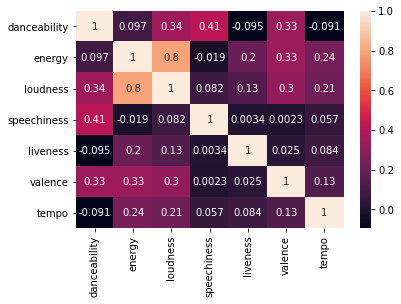

In [17]:
sn.heatmap(finalDF.corr(), annot=True)
plt.show()

In [25]:
data = finalDF[["danceability","energy","loudness","speechiness","liveness","valence","tempo","like"]]
data["like"] = data["like"].apply(lambda x: int(x))
data

,danceability,energy,loudness,speechiness,liveness,valence,tempo,like
0,0.954,0.522,-7.032,0.3660,0.1120,0.439,105.044,1
1,0.465,0.840,-4.350,0.0722,0.1380,0.672,83.981,1
2,0.738,0.758,-4.755,0.0803,0.1250,0.385,146.146,1
3,0.785,0.721,-5.457,0.0506,0.2850,0.894,121.962,1
4,0.783,0.479,-10.646,0.5410,0.1010,0.533,176.027,1
...,...,...,...,...,...,...,...,...
1224,0.644,0.919,-6.289,0.0561,0.6220,0.871,117.459,0
1225,0.421,0.677,-6.183,0.0343,0.2110,0.683,127.670,0
1226,0.336,0.792,-10.875,0.0840,0.0437,0.427,155.587,0
1227,0.645,0.598,-13.180,0.0335,0.0721,0.913,105.929,0


In [26]:
#Split Data into training and testing
x = data.drop("like", axis=1)
y = data["like"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [27]:
#Standardize Columns
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
#Making and training the model
mlpc = MLPClassifier(hidden_layer_sizes=(7,7), max_iter=500)
mlpc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(7, 7), max_iter=500)

In [35]:
#Predicting
mlpc_pred = mlpc.predict(x_test)

In [36]:
print(classification_report(y_test, mlpc_pred))
print(confusion_matrix(y_test, mlpc_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       136
           1       0.87      0.93      0.90       110

    accuracy                           0.91       246
   macro avg       0.90      0.91      0.91       246
weighted avg       0.91      0.91      0.91       246

[[121  15]
 [  8 102]]
